# Homework 02: Data Visualization and Data Wrangling 
***

**Name**: CJ Kennedy

***

This assignment is due on Canvas by **6:00PM on Friday September 9**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

As always, you should import Pandas and NumPy when you start working with data.

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np


In this homework you will also be creating some graphs. Therefore, lets also load Matplotlib's Pylab library to set up Jupyter so that it will plot directly in the notebook.

Pylab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for working with arrays) in a single name space.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline 
    # 'inline' puts your graph in the cell versus a new popup window

# Problem 1
***
We are tasked with a consulting job for a Hotel/Vacation booking startup called $\color{red}{\text{Hotels Everyone Loves Leasing}}$, or HELL.com (an unfortunate marketing snaffu).

In order to advise HELL.com we will need to wrangle some data and see what story it has to tell before we advise the creators of this new booking website.

# Part A
***1] (1 point) Read in the csv file, "hotel_bookings.csv"***

For simplicity sake, put the data file in the same folder as the Jupyter notebook file.



In [3]:
# Call your dataframe "Hotel" and be sure to preface it with a "df".
# Per the standard naming procedure a prefix of "df" indicates a dataframe.
# Therefore, to be specific, call your dataframe "dfHotel"

# Read in the file here for #1
# Path to the data
file_path = 'hotel_bookings.csv'

# Load the data into a DataFrame 
dfHotel = pd.read_csv(file_path)

***2] (1 point) Take a look at your data.***

See the description of the data below to determine what each column represents.

Always look at the data to determine if it needs cleaning; in reality data will nearly always need cleaned.

In [4]:
# code here for part A, #2 to see all/partial dataframe

# inspect first 5 rows
dfHotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,distribution_channel,is_repeated_guest,agent,adr,total_of_special_requests
0,Resort Hotel,0,342,27,1,0,0,2,0.0,Direct,0,NaN,0.0,0
1,Resort Hotel,0,737,27,1,0,0,2,0.0,Direct,0,NaN,0.0,0
2,Resort Hotel,0,7,27,1,0,1,1,0.0,Direct,0,NaN,75.0,0
3,Resort Hotel,0,13,27,1,0,1,1,0.0,Corporate,0,304.0,75.0,0
4,Resort Hotel,0,14,27,1,0,2,2,0.0,TA/TO,0,240.0,98.0,1


# Description of this data set
The data set looks as if it has alreaded been 'cleaned'.

**hotel**: This column lists the types of hotels that were booked.

**is_cancelled**: This column indicates whether or not the booking was cancelled (1) or not (0).

**lead_time**: This column is the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

**arrival_date_week_number**: Week number of the year for arrival

**arrival_date_day_of_month**: Day of arrival date.

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults**: number of adults

**children**: number of children

**distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)

**agent**: ID of the travel agency that made the booking

**adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)

# Part B
***

***1] (1 points) Which week-number of the year is the most common arrival week?***

You can use `dfHotel.mode()` to find the mode for $\color{red}{\text{all columns}}$, and you can also use `dfHotel["arrival_date_week_number"].mode()` to find the mode of $\color{red}{\text{just one column}}$, i.e. 'arrival_date_week_number'.

However, when you use the latter, the return will be an index of 0 and then the mode you seek. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html


In [5]:
# Code your solution to part B #1 here:
output = dfHotel["arrival_date_week_number"].mode()
print("The most common arrival week is week",output[0],".")

The most common arrival week is week 33 .


***2] (1 points) Purely by the number, did weekends see more bookings or weekdays?.***

In [6]:
# Code your solution to part B #2 here
weekendsCount = dfHotel["stays_in_weekend_nights"].sum()
weekdaysCount = dfHotel["stays_in_week_nights"].sum()
print("There are",weekendsCount,"bookings for weekends and",weekdaysCount,"for weekdays.")
print("Therefore, there are more weekday bookings.")

There are 110746 bookings for weekends and 298511 for weekdays.
Therefore, there are more weekday bookings.


***3] (1 points) How many rows are in this data set?***


In [7]:
# Code Part B #3 solution here (advice: use `len`)
length = len(dfHotel)
print("There are",length,"rows in the data set.")

There are 119390 rows in the data set.


***4] (1 points) How many types of hotels do we have information on?***


In [8]:
# Code Part B #4 solution here (advice: use `set` and/or `len`)
types = (dfHotel["hotel"].nunique())
print("There are",types,"types of hotels, Resort and City hotels.")

There are 2 types of hotels, Resort and City hotels.


***5] (1 points) Which type of hotel has more cancellations?***

In [9]:
# Code Part B #5 solution here:
# count() for each hotel
resortCancel = dfHotel.loc[dfHotel['hotel'] == 'Resort Hotel', 'is_canceled'].count()
cityCancel = dfHotel.loc[dfHotel['hotel'] == 'City Hotel', 'is_canceled'].count()
# print
print("Resort Hotels have",resortCancel,"cancellations while City Hotels have", cityCancel, "cancellations.")
print("Therfore, City Hotels have more cancellations.")

Resort Hotels have 40060 cancellations while City Hotels have 79330 cancellations.
Therfore, City Hotels have more cancellations.


# Part C
***

'Hotels Everyone Loves Leasing' would now like some information about customer arrival dates.

***1] (3 points) Create a $\color{red}{\text{density}}$ histogram for `arrival_date_day_of_month` ***

*** Comment on the histogram shape (Right/Left skew, symmetric, uniform,...)***

***What would you tell your advisees about the most common day of arrival?***


bin edges =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


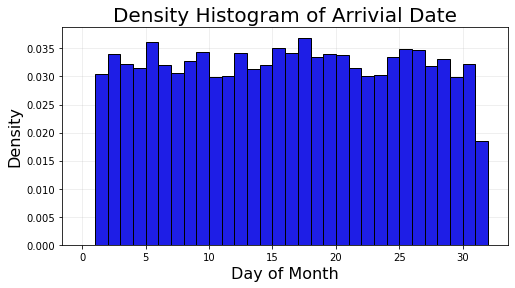

In [10]:
# Adapted from nb03
# Initialize figure and ranges for bins
fig, ax = plt.subplots(figsize=(8,4))
my_bins = range(0,33,1)
# Plot histogram with custom colors
mycolor =np.array([30,30,230])/255
dfHotel.hist(column="arrival_date_day_of_month", density=True, ax=ax, bins=my_bins, facecolor=mycolor, edgecolor="black")

# Add a title
ax.set_title("Density Histogram of Arrivial Date", fontsize=20)

# Add axis labels 
ax.set_xlabel("Day of Month", fontsize=16)
ax.set_ylabel("Density", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

# ***Comment on histogram shape and advice in this cell.***
The data is uniform when the bins are set to show each day. However, it can be seen that the 18th bin is the "tallest." Thus, the 17th day of the month is the most common day of arrival.

***2] (8 points) Give a 5-number summary and box-and-whisker plot for the week number of year for arrival date and advise on what you find.*** 

In [11]:
# sample code from nb02 exercise 2
minval = dfHotel["arrival_date_week_number"].min()
maxval = dfHotel["arrival_date_week_number"].max()
Q1 = dfHotel["arrival_date_week_number"].quantile(.25)
Q2 = dfHotel["arrival_date_week_number"].quantile(.50)
Q3 = dfHotel["arrival_date_week_number"].quantile(.75)
print("5-Number Summary: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minval, Q1, Q2, Q3, maxval))
print("(minimum, first, second, and third quantiles, maximum)")
dfHotel["arrival_date_week_number"].mode()

5-Number Summary: 1.00    16.00    28.00    38.00    53.00
(minimum, first, second, and third quantiles, maximum)


0    33
Name: arrival_date_week_number, dtype: int64

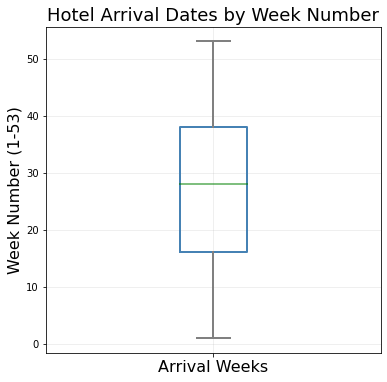

In [12]:
# adapted from nb03 
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,6))

# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = dfHotel.boxplot(column="arrival_date_week_number", ax=ax, widths=[.2], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Hotel Arrival Dates by Week Number', fontsize=18)
ax.set_ylabel("Week Number (1-53)", fontsize=16)

# Set names of plots
plt.xticks([1],["Arrival Weeks"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25)

***Put your advice for week number of year for arrival date here.***

The median, which appears at 28, is not centered in the box. It is slightly "higher" (negative skew) as the week with the most arrivals is week 33. Backing up, the "box" or the middle 50% of the arrival dates has bounds between week 16 and 38. Thus, these weeks will see the most arrival dates. Lastly, the weeks before the first quantile and after the last quantile (weeks 1-16 and weeks 38-52) see lesser arrival dates. 


# Part D
***

Now it is requested that you describe your findings concerning the lead time for hotel reservations.

***1] (2 points) Create a $\color{red}{\text{frequency}}$ histogram of `lead_time`***

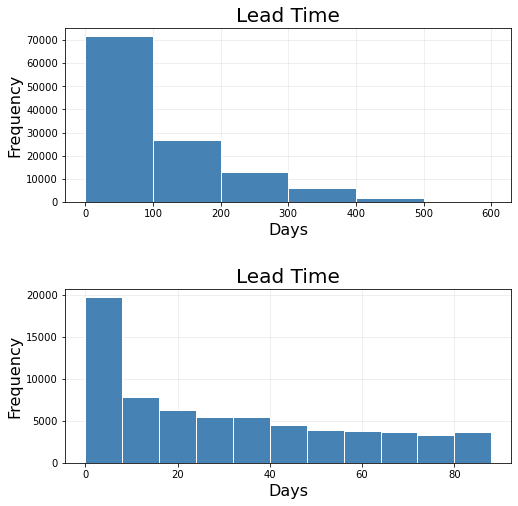

In [13]:
# adapted from nb03 exercise 2
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
my_bins = range(0,700,100)
# nrows=2, ncols=1 means the histograms will be stacked in 2 rows with 1 column

# --------------------------------------
# Plot histogram for Niwot on Top 
# --------------------------------------
dfHotel.hist(column="lead_time", ax=axes[0],  bins=my_bins, facecolor="steelblue", edgecolor="white")
# ax=axes[0] implies the first of 2 histograms which are indexed as 0 and 1.

# Add titles and labels 
axes[0].set_title("Lead Time", fontsize=20)
axes[0].set_xlabel("Days", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for Sugarloaf on Bottom 
# --------------------------------------
my_bins = range(0,95,8)
dfHotel.hist(column="lead_time", ax=axes[1], bins=my_bins, facecolor="steelblue", edgecolor="white")
# ax=axes[1] implies the second of 2 histograms which are indexed as 0 and 1.

# Add titles and labels 
axes[1].set_title("Lead Time", fontsize=20)
axes[1].set_xlabel("Days", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
#axes[0].set_xlim([50,95])
#axes[1].set_xlim([50,95])

#axes[0].set_ylim([0,9])
#axes[1].set_ylim([0,9]);

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)

***2] (2 points) What shape is the histogram; right skew, left skew, symmetric, uniform,... and what does the histogram shape indicate about the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.?***

The first histogram is clearly right skew as much of the data lies before 100 days. The true range of data goes up until 737 days, but it is quite clear that the frequency of lead times over a year or two is quite low. So, the second histogram shows a clearer picture of right skewed data. Specifically, the first 10 days from booking to arrival is seen to have the largest frequency. 


***3] (2 points) What is the average (mean) lead time for all hotels?***

In [14]:
#
leadMean = dfHotel["lead_time"].mean()
print("The average (mean) lead time for all hotels is {:.1f}".format(leadMean),"days.")


The average (mean) lead time for all hotels is 104.0 days.


# Problem 2
***

For Problem 2 we are looking at the data from a study investigating school childrens intelligence. The data consists of 1500 participants and some of their data.

# Part A

***1] (1 point) Read in the csv file, "foot_smart.csv".***

Create a data frame called FootIQ and take a look at it.

In [15]:
# Read in the file and look at it here:
# Path to the data
file_path = 'foot_smart.csv'

# Load the data into a DataFrame 
dfFootIQ = pd.read_csv(file_path)
# Print first and last five
dfFootIQ.head(-1)

,foot_length,shoe_size,sex,IQ,US_section,city_size
0,7.96,8,0,23.8,West,500K
1,6.76,7,0,21.3,West,500K
2,6.96,7,1,22.2,East,500K
3,7.86,8,1,25.3,East,100K
4,8.17,9,0,23.9,East,100K
...,...,...,...,...,...,...
1494,7.41,8,1,23.0,East,1M
1495,6.89,7,0,22.9,South,1K
1496,6.03,7,0,18.8,North,1K
1497,8.83,9,1,26.0,North,1M


# Description of this data Set

This is a data set of 1500 participants. The participants are all children from 7 different schools. 

***foot_length:*** This is the length of the students foot in inches.

***shoe_size:*** This is the size of the shoe worn by the student.

***sex:*** This is the sex of the student: 0 female, 1 male.

***IQ:*** This is a measure of intelligence as measured on a standard exam, scaled from 0 to 35.

***US_section:*** This is the section of the U.S. that the student comes from.

***city_size:*** This is the approximate size of the city (in thousands) from which the student came from.

***2] (4 points) Clean the data***

Notice that `city_size` has data entered as '100K' for 100,000 and 1M for 1,000,000.

Clean this column so that it holds integers such as 100000 and 1000000 instead of 100K and 1M. 

In [16]:
#Code here for #2 and cleaning the data
dfFootIQ['city_size'] = dfFootIQ['city_size'].str.replace('K','000')
dfFootIQ['city_size'] = dfFootIQ['city_size'].str.replace('M','000000')
dfFootIQ['city_size'] = dfFootIQ['city_size'].astype(int) # conver to int

In [17]:
# Print first and last five
dfFootIQ.head(-1)

,foot_length,shoe_size,sex,IQ,US_section,city_size
0,7.96,8,0,23.8,West,500000
1,6.76,7,0,21.3,West,500000
2,6.96,7,1,22.2,East,500000
3,7.86,8,1,25.3,East,100000
4,8.17,9,0,23.9,East,100000
...,...,...,...,...,...,...
1494,7.41,8,1,23.0,East,1000000
1495,6.89,7,0,22.9,South,1000
1496,6.03,7,0,18.8,North,1000
1497,8.83,9,1,26.0,North,1000000


# Part B
***

***Suppose we were to make a scatterplot for foot length and city size (`foot_length` and `city_size`).***

***Note (i)*** The scatter plot has discrete values on the y-axis which makes the 'scatter plot' look like lines.

***Note (ii)*** There is no discernible pattern. The city's of various sizes (on the y-axis) contain students with shoe sizes (on the x-axis) all across the shoe-size spectrum. Meaning students of a particular shoe size do not tend to congregate in citys  of a particular size.

This seems to be common sense; for instance, there is no reason why every student of shoe size 7 would come from a city of size 500,000.

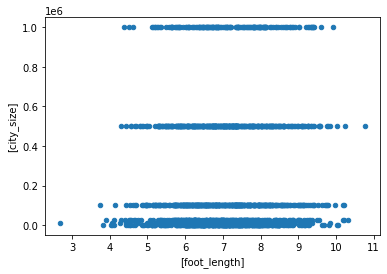

In [18]:
# Uncomment the code below and run it.
ax1 = dfFootIQ.plot.scatter(x=['foot_length'], y=['city_size']);

***Make two scatterplots:***

   1] ***(2 points)*** A scatterplot for shoe_size and IQ

   2] ***(2 points)*** A scatterplot for foot_length and IQ

Note: these two scatterplots should reveal the same thing since shoe size and foot lenght are really the same thing. The scatterplots will look different though since shoe size is discrete and foot length is continuous.

3] ***(1 point)*** Explain your findings. Either explain why no pattern is found, or if you detect a pattern, then explain why such a pattern exists between shoe size and intelligence.

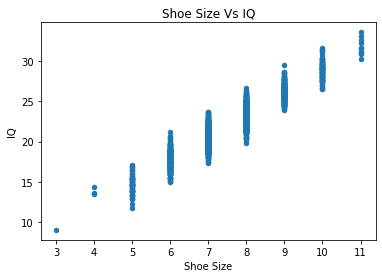

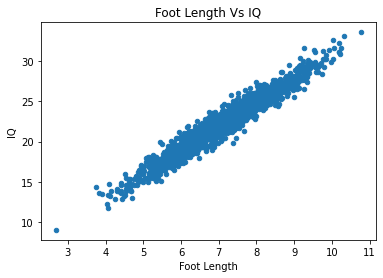

In [19]:
# Scatter Plot 1
shoeVsIQ = dfFootIQ.plot.scatter(x=['shoe_size'], y=['IQ'])
# Titles and Labels
shoeVsIQ.set_xlabel("Shoe Size")
shoeVsIQ.set_ylabel("IQ")
shoeVsIQ.set_title('Shoe Size Vs IQ')
# Scatter Plot 2
footVsIQ = dfFootIQ.plot.scatter(x=['foot_length'], y=['IQ'])
footVsIQ.set_xlabel("Foot Length")
footVsIQ.set_ylabel("IQ")
footVsIQ.set_title('Foot Length Vs IQ');

***Explain your scatterplot findings for Part B here:***

It is clear as size/length is increased from 3 to 11, the IQ increases. This is likely due to children have less education and experience, and therefore a lower IQ. 

# Problem 3
***

# Part A
The mean of a set of data should of course change if/when the values in the data set change.

The code in the cell below finds the mean shoe size for the dfFootIQ data


In [20]:
# Uncomment the code below and run it
print("The mean shoe size is ", (dfFootIQ["shoe_size"]).mean())

The mean shoe size is  7.556666666666667


Now, suppose you add 2 to each shoe size in the data set. How will the mean change?

In [21]:
# Uncomment the code below and run it.
print("The mean shoe size with 2 added to each entry is ", (dfFootIQ["shoe_size"]+2).mean())

The mean shoe size with 2 added to each entry is  9.556666666666667


***(4 points)*** It appears that the mean simply increases by 2. Does adding 'a' to each data point simply increase the mean by 'a'? ***Prove it.***

Recall the formula for mean:

$$\bar{x} = \frac{1}{n} \displaystyle\sum_{k=1}^n x_k$$


Let $\bar{x}'$ denote the new mean with 'a' added to each data point.
$$\bar{x}' = \frac{1}{n} \displaystyle\sum_{k=1}^n (x_k+a)$$
<p style="text-align: right;">(all k points have a added)</p>
$$\bar{x}' = \frac{1}{n} \displaystyle\sum_{k=1}^n (x_k) + \frac{1}{n} \sum_{k=1}^n (a)$$
<p style="text-align: right;">(distribute summation)</p>
$$\bar{x}' = \frac{1}{n} \displaystyle\sum_{k=1}^n (x_k) + \frac{1}{n} (na)$$
$$\bar{x}' = \left(\frac{1}{n} \displaystyle\sum_{k=1}^n (x_k)\right) + a$$
$$\bar{x}' = \displaystyle\bar{x} + a$$
<p style="text-align: right;">($\bar{x}$ definition)</p>

# Part B
The standard deviation of a set of data should of course change if/when the values in the data set change.

The code in the cell below finds the standard deviation for 'shoe size' in the dfFootIQ data.

In [22]:
# Uncomment the code below and run it.
print("Standard deviation for shoe size is ", (dfFootIQ["shoe_size"]).std())

Standard deviation for shoe size is  1.224113771362388


Now, suppose we add 2 to each shoe sizein the data set. How will the standard deviation change?

In [23]:
# Uncomment the code below and run it.
print("The standard deviation with 2 added to each entry is ", (dfFootIQ["shoe_size"]+2).std())


The standard deviation with 2 added to each entry is  1.224113771362388


***(4 points)*** It appears as if the standard deviation doesn't change at all after the addition of 2 to each data point. Is it always true that adding 'a' to each data point does not change the standard deviation? ***Prove it.***

Recall the formula for standard deviation:

$$s = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k - \bar{x}\right)^2} $$


Let $s'$ denote the new standard deviation with 'a' added to each data point.
$$s' = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k' - \bar{x}'\right)^2} $$
$$s' = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k' - (\bar{x}+a)\right)^2} $$
<p style="text-align: right;">(proven in part A)</p>
$$s' = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( (x_k+a) - (\bar{x}+a)\right)^2} $$
<p style="text-align: right;">(all k points have a added)</p>
$$s' = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k - \bar{x}\right)^2} = s$$
<p style="text-align: right;">(a's cancel out)</p>

# Part C
Suppose each data point in `shoe_size` were to be multiplied by 5.

In [24]:
# Uncomment the code below and run it.
print("The mean shoe size is ", (dfFootIQ["shoe_size"]).mean())
print("The mean after each shoe size is multiplied by 5 is  ", (dfFootIQ["shoe_size"]*5).mean())

The mean shoe size is  7.556666666666667
The mean after each shoe size is multiplied by 5 is   37.78333333333333


***(4 points)*** Prove the pattern that you notice above will occur every time under multiplication.

Let $\bar{x}$ represent the mean on the data set $x_k$ and $\bar{x}'$ be the mean on the altered set, $x_k'$.
$$\bar{x}' = \frac{1}{n} \displaystyle\sum_{k=1}^n (x_k')$$
$$\bar{x}' = \frac{1}{n} \displaystyle\sum_{k=1}^n (x_k\cdot a)$$
$$\bar{x}' = \frac{a}{n} \displaystyle \sum_{k=1}^n (x_k)$$
<p style="text-align: right;">(since a is a constant)</p>
$$\bar{x}' = a\cdot \left(\frac{1}{n} \displaystyle \sum_{k=1}^n (x_k)\right)$$
$$ = a\cdot \bar{x}$$

# Part D

Again, suppose each data point in `shoe_size` were to be multiplied by 5.

In [25]:
# Uncomment the code below and run it. 

print("The shoe size standard deviation is ", (dfFootIQ["shoe_size"]).std())
print("The shoe size standard deviation after multiplying each point by 5 is ", (dfFootIQ["shoe_size"]*5).std())



The shoe size standard deviation is  1.224113771362388
The shoe size standard deviation after multiplying each point by 5 is  6.120568856811966


***(4 points)*** Prove the pattern that you notice above will occur every time under multiplication.

Let $s'$ denote the new standard deviation with 'a' multiplied by each data point.
$$s' = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k' - \bar{x}'\right)^2} $$
$$s' = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( (x_k\cdot a) - (\bar{x} \cdot a)\right)^2} $$
<p style="text-align: right;">(definitions of $x_k'$ and $\bar{x}'$(part C))</p>
$$s' = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( a(x_k - \bar{x})\right)^2} $$
$$s' = \sqrt{\frac{a^2}{n-1} \sum_{k=1}^n \left((x_k - \bar{x})\right)^2} $$
$$s' = a\sqrt{\frac{1}{n-1} \sum_{k=1}^n \left((x_k - \bar{x})\right)^2} = a \cdot s $$ 